In [120]:
# discliamer
# - this wasn't built to run on series of different lengths and not aligned in time.
# - for example, run this on departments instead of SKUs -- it may "Just Work" on irregular series data
# - if you have varied length series, maybe start at the most recent data, and move back 1 year and truncate your data
# - this is a quick sample script and is not robust, please modify based on needs


In [127]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
cwd = os.getcwd()
cwd


'/Users/bill.garvert'

These are the inputs

In [128]:
date_col = "Date"
target = "Sales"
series_id = "Department" # THIS needs to be a single column

In [129]:
d = pd.read_csv("/Users/bill.garvert/Documents/time_series_poc_certification_training.csv", parse_dates=[date_col])
d.sort_values(by=date_col, ascending=True, inplace=True)

In [130]:
d.head(8)


,Department,Date,Sales,Department_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Athletic Clothing,2012-04-01,80874,2060,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
1484,Beauty,2012-04-01,41834,1890,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
2224,Beverages,2012-04-01,22954,2050,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
3731,"Camera, Photo, and Video",2012-04-01,54724,1952,17,0.811287,158,8.713822,In Store Credit Card Signup Discount; Spring P...,No,0.030232,0.780263,NaN,-0.025092
5251,Childrens Fashion,2012-04-01,41811,1940,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
5985,Computer Parts and Components,2012-04-01,31417,1801,10,0.744965,81,9.795283,In Store Credit Card Signup Discount; Spring P...,No,0.030387,0.780263,NaN,-0.025092
6751,Computers and Tablets,2012-04-01,19552,1569,6,0.735032,64,8.979314,In Store Credit Card Signup Discount; Spring P...,No,0.029981,0.780263,NaN,-0.025092
7501,"Dairy, Cheese, and Eggs",2012-04-01,23529,2050,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092


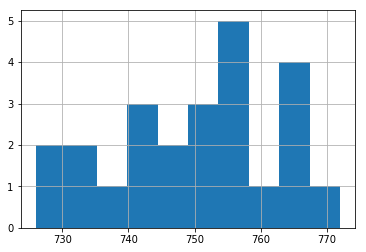

In [131]:
# Check to see if your series are similar lengths
d.groupby(series_id).count()[date_col].hist()
plt.show()

In [132]:
d[series_id].value_counts()

Camera, Photo, and Video           772
Headphones                         767
Computer Parts and Components      766
Toys and Games                     763
Pet Supplies                       763
Mens Fashion                       759
Fruit and Vegetables               758
Bathing Suits                      758
Video Games                        755
Bluetooth and Wireless Speakers    755
Electronics                        754
Beverages                          752
Computers and Tablets              750
Meat and Seafood                   750
Cell Phones and Accessories        748
Sports Equipment                   746
Womens Fashion                     742
Lawn and Garden                    740
Beauty                             740
Snack Foods                        739
Dairy, Cheese, and Eggs            734
Childrens Fashion                  734
TV and Video                       729
Athletic Clothing                  726
Name: Department, dtype: int64

In [133]:
# get max time step for each series
t = d.copy()
t['diff'] = d.groupby(series_id)['Date'].diff().dt.days
t.groupby(series_id)['diff'].max()

Department
Athletic Clothing                  4.0
Bathing Suits                      7.0
Beauty                             5.0
Beverages                          5.0
Bluetooth and Wireless Speakers    4.0
Camera, Photo, and Video           5.0
Cell Phones and Accessories        5.0
Childrens Fashion                  5.0
Computer Parts and Components      4.0
Computers and Tablets              6.0
Dairy, Cheese, and Eggs            6.0
Electronics                        5.0
Fruit and Vegetables               4.0
Headphones                         4.0
Lawn and Garden                    5.0
Meat and Seafood                   4.0
Mens Fashion                       4.0
Pet Supplies                       4.0
Snack Foods                        6.0
Sports Equipment                   6.0
TV and Video                       4.0
Toys and Games                     4.0
Video Games                        4.0
Womens Fashion                     4.0
Name: diff, dtype: float64

In [134]:
# transform Date
d['Date'] = pd.to_datetime(d['Date'])



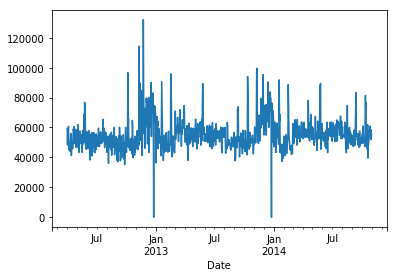

In [135]:
d.groupby(date_col).mean()[target].plot()
plt.show()

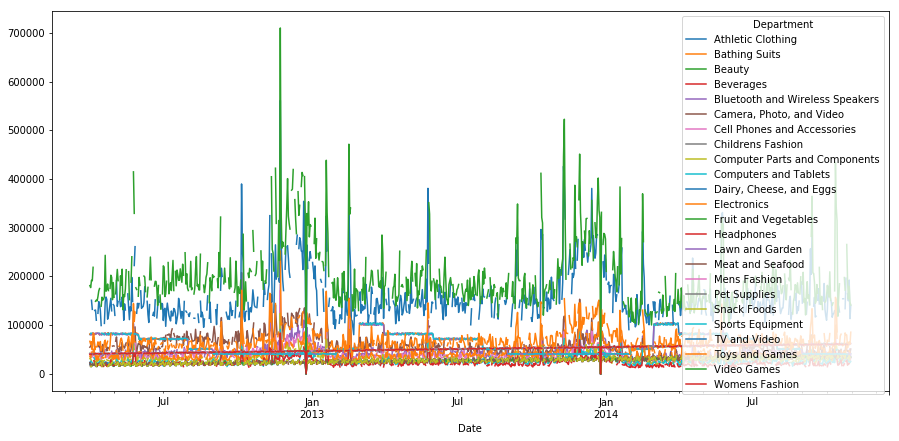

In [136]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
d.groupby([date_col,series_id]).mean()[target].unstack().plot(ax=ax)

In [137]:
def fill_missing_dates(group):
    date_range = pd.date_range(group.index.min(), group.index.max(), freq='D')
    group = group.reindex(date_range)
    return group

In [138]:
training = d.set_index(date_col).groupby(series_id).apply(fill_missing_dates).rename_axis((series_id,date_col)).drop(series_id, axis=1).reset_index()

In [139]:
training.to_csv('with_filled_in_Dates.csv', index=False)

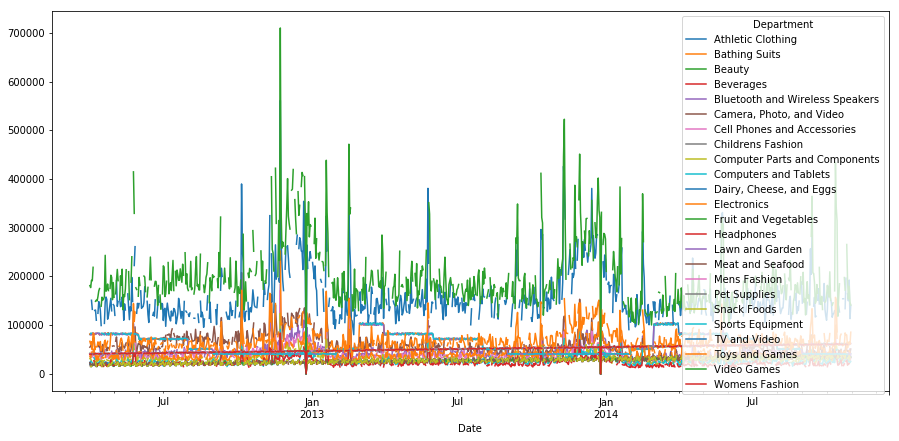

In [140]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
training.groupby([date_col,series_id]).mean()[target].unstack().plot(ax=ax)

In [141]:
# check if the above worked
training.groupby(series_id)[date_col].diff().value_counts()

# count
training[target].isna().sum(), training.shape, training[date_col].max()

(4638, (22638, 14), Timestamp('2014-10-31 00:00:00'))

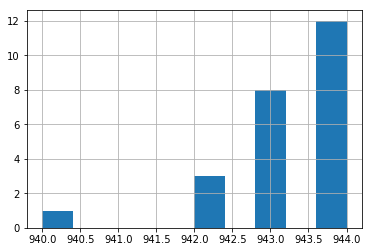

In [142]:
# Check to see if your series are similar lengths
training.groupby(series_id).count()[date_col].hist()
plt.show()# Check to see if your series are similar lengths


In [143]:
training[series_id].value_counts()

Childrens Fashion                  944
Computers and Tablets              944
TV and Video                       944
Meat and Seafood                   944
Video Games                        944
Athletic Clothing                  944
Beverages                          944
Toys and Games                     944
Camera, Photo, and Video           944
Womens Fashion                     944
Mens Fashion                       944
Dairy, Cheese, and Eggs            944
Electronics                        943
Sports Equipment                   943
Beauty                             943
Headphones                         943
Fruit and Vegetables               943
Bluetooth and Wireless Speakers    943
Computer Parts and Components      943
Bathing Suits                      943
Snack Foods                        942
Cell Phones and Accessories        942
Lawn and Garden                    942
Pet Supplies                       940
Name: Department, dtype: int64

In [144]:
# get max time step for each series
t = training.copy()
t['diff'] = d.groupby(series_id)['Date'].diff().dt.days
t.groupby(series_id)['diff'].max()

Department
Athletic Clothing                  4.0
Bathing Suits                      7.0
Beauty                             5.0
Beverages                          4.0
Bluetooth and Wireless Speakers    5.0
Camera, Photo, and Video           5.0
Cell Phones and Accessories        4.0
Childrens Fashion                  6.0
Computer Parts and Components      6.0
Computers and Tablets              4.0
Dairy, Cheese, and Eggs            4.0
Electronics                        5.0
Fruit and Vegetables               4.0
Headphones                         4.0
Lawn and Garden                    6.0
Meat and Seafood                   6.0
Mens Fashion                       4.0
Pet Supplies                       4.0
Snack Foods                        4.0
Sports Equipment                   3.0
TV and Video                       NaN
Toys and Games                     NaN
Video Games                        NaN
Womens Fashion                     NaN
Name: diff, dtype: float64

In [145]:
training




,Department,Date,Sales,Department_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Athletic Clothing,2012-04-01,80874.0,2060.0,31.0,0.760756,371.0,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
1,Athletic Clothing,2012-04-02,80532.0,2060.0,33.0,0.781784,308.0,5.835458,In Store Credit Card Signup Discount; Spring P...,No,0.028092,NaN,NaN,NaN
2,Athletic Clothing,2012-04-03,82474.0,2060.0,65.0,0.444975,386.0,6.180215,In Store Credit Card Signup Discount; Spring P...,No,0.029847,NaN,NaN,NaN
3,Athletic Clothing,2012-04-04,83639.0,2060.0,67.0,0.836780,364.0,7.149818,In Store Credit Card Signup Discount; Spring P...,No,0.028064,NaN,NaN,NaN
4,Athletic Clothing,2012-04-05,81763.0,2060.0,65.0,0.991318,567.0,10.323724,In Store Credit Card Signup Discount; Spring P...,No,0.030224,NaN,NaN,NaN
5,Athletic Clothing,2012-04-06,81082.0,2060.0,65.0,0.605925,709.0,8.392068,In Store Credit Card Signup Discount; Spring P...,No,0.030482,NaN,4300.0,NaN
6,Athletic Clothing,2012-04-07,82190.0,2060.0,68.0,0.342021,491.0,9.113846,In Store Credit Card Signup Discount; Spring P...,No,0.038417,NaN,NaN,NaN
7,Athletic Clothing,2012-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Athletic Clothing,2012-04-09,80984.0,2060.0,45.0,0.059526,223.0,10.039990,In Store Credit Card Signup Discount; Spring P...,No,0.037888,NaN,NaN,NaN
9,Athletic Clothing,2012-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
#define function to build clusters    
def build_clusters(data, corr_cut = .7):

    s=pd.concat([data[[date_col]],data.pivot(columns=series_id, values=target)],axis=1)
    s = s.groupby(date_col).first()
    
    s_corr = s.corr()
    max_col = 0
    max_cluster = 0
    for col in s_corr.columns:
        num_cor = np.shape(s_corr.columns[s_corr.loc[col,:]>corr_cut])[0]
        if num_cor>max_cluster:
            max_cluster=num_cor
            max_col = col
    clus_vals = np.array(s_corr.loc[max_col,:][s_corr.loc[max_col,:]>corr_cut].index)
    data_c1 = data[data[series_id].isin(clus_vals)]
    data_rem1 = data[~data[series_id].isin(clus_vals)]
    
    
    # . + ' Starting unique series')
    var1 = data[series_id].nunique()
    print (str(var1)  + " Starting unique series")
    var2 = data_rem1[series_id].nunique()
    print (str(var2) + ' Remaining series after removing cluster')
    print ('Biggest Cluster: ' +  str(max_col) + ' with ' + str(max_cluster) + " Cluster Members: " + str(clus_vals))
    var3 = data_rem1[series_id].unique()
    print ("Remaining Series: " + str(var3))
    #print (data_rem1[series_id].unique())
        
    plt.matshow(s_corr)
    plt.show()
    

    return data_c1, data_rem1


24 Starting unique series
19 Remaining series after removing cluster
Biggest Cluster: Beauty with 5 Cluster Members: ['Beauty' 'Childrens Fashion' 'Mens Fashion' 'Pet Supplies'
 'Womens Fashion']
Remaining Series: ['Athletic Clothing' 'Beverages' 'Camera, Photo, and Video'
 'Computer Parts and Components' 'Computers and Tablets'
 'Dairy, Cheese, and Eggs' 'Electronics' 'Meat and Seafood' 'TV and Video'
 'Toys and Games' 'Video Games' 'Bathing Suits' 'Fruit and Vegetables'
 'Sports Equipment' 'Snack Foods' 'Bluetooth and Wireless Speakers'
 'Lawn and Garden' 'Headphones' 'Cell Phones and Accessories']


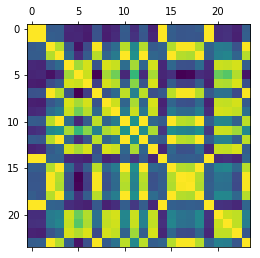

In [157]:
dc1, dr1= build_clusters(d, corr_cut = .95)

19 Starting unique series
9 Remaining series after removing cluster
Biggest Cluster: Bluetooth and Wireless Speakers with 10 Cluster Members: ['Bluetooth and Wireless Speakers' 'Camera, Photo, and Video'
 'Cell Phones and Accessories' 'Computer Parts and Components'
 'Computers and Tablets' 'Electronics' 'Headphones' 'TV and Video'
 'Toys and Games' 'Video Games']
Remaining Series: ['Athletic Clothing' 'Beverages' 'Dairy, Cheese, and Eggs'
 'Meat and Seafood' 'Bathing Suits' 'Fruit and Vegetables'
 'Sports Equipment' 'Snack Foods' 'Lawn and Garden']


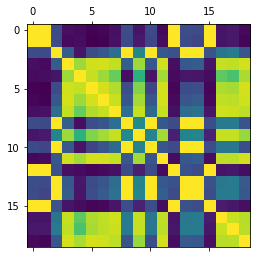

In [158]:
dc2, dr2 = build_clusters(dr1, corr_cut = .80)

9 Starting unique series
4 Remaining series after removing cluster
Biggest Cluster: Beverages with 5 Cluster Members: ['Beverages' 'Dairy, Cheese, and Eggs' 'Fruit and Vegetables'
 'Meat and Seafood' 'Snack Foods']
Remaining Series: ['Athletic Clothing' 'Bathing Suits' 'Sports Equipment' 'Lawn and Garden']


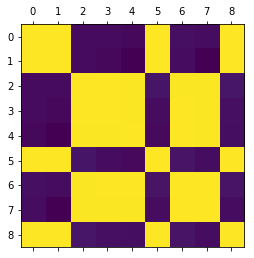

In [171]:
dc3, dr3 = build_clusters(dr2, corr_cut = .60)

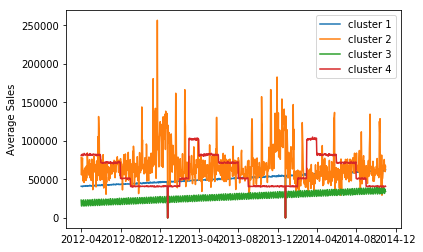

In [160]:
plt.plot(dc1.groupby(date_col).mean()[target], label='cluster 1')
plt.plot(dc2.groupby(date_col).mean()[target], label='cluster 2')
plt.plot(dc3.groupby(date_col).mean()[target], label='cluster 3')
plt.plot(dr3.groupby(date_col).mean()[target], label='cluster 4')


plt.ylabel('Average ' + target)
plt.legend()
plt.show()

In [161]:
dc1.to_csv('cluster_1of4.csv', index=False)
dc2.to_csv('cluster_2of4.csv', index=False)
dc3.to_csv('clustedc30f4.csv', index=False)
dr3.to_csv('cluster_4of4.csv', index=False)


In [162]:
#Cluster 1 wdc1th filled in dates
Cluster1= dc1.set_index(date_col).groupby(series_id).apply(fill_missing_dates).rename_axis((series_id,date_col)).drop(series_id, axis=1).reset_index()


In [163]:
Cluster1.to_csv('cluster_1_filledin.csv', index=False)


In [164]:
#Cluster 2 wdc1th filled in dates
Cluster2= dc2.set_index(date_col).groupby(series_id).apply(fill_missing_dates).rename_axis((series_id,date_col)).drop(series_id, axis=1).reset_index()

In [165]:
Cluster2.to_csv('cluster_2_filledin.csv', index=False)


In [166]:
#Cluster 3 wdc1th filled in dates
Cluster3= dc3.set_index(date_col).groupby(series_id).apply(fill_missing_dates).rename_axis((series_id,date_col)).drop(series_id, axis=1).reset_index()

In [167]:
Cluster3.to_csv('cluster_3_filledin.csv', index=False)


In [169]:
#Cluster 4 wdc1th filled in dates
Cluster4= dr3.set_index(date_col).groupby(series_id).apply(fill_missing_dates).rename_axis((series_id,date_col)).drop(series_id, axis=1).reset_index()

In [170]:
Cluster4.to_csv('cluster_4_filledin.csv', index=False)
